<a href="https://colab.research.google.com/github/ptong7/Colab-Projects/blob/main/Employee_Attrition_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
df = pd.read_csv("/content/sample_data/WA_Fn-UseC_-HR-Employee-Attrition.csv")
df.info()
display(df.head(5).to_html())
df.describe().T.round(2)

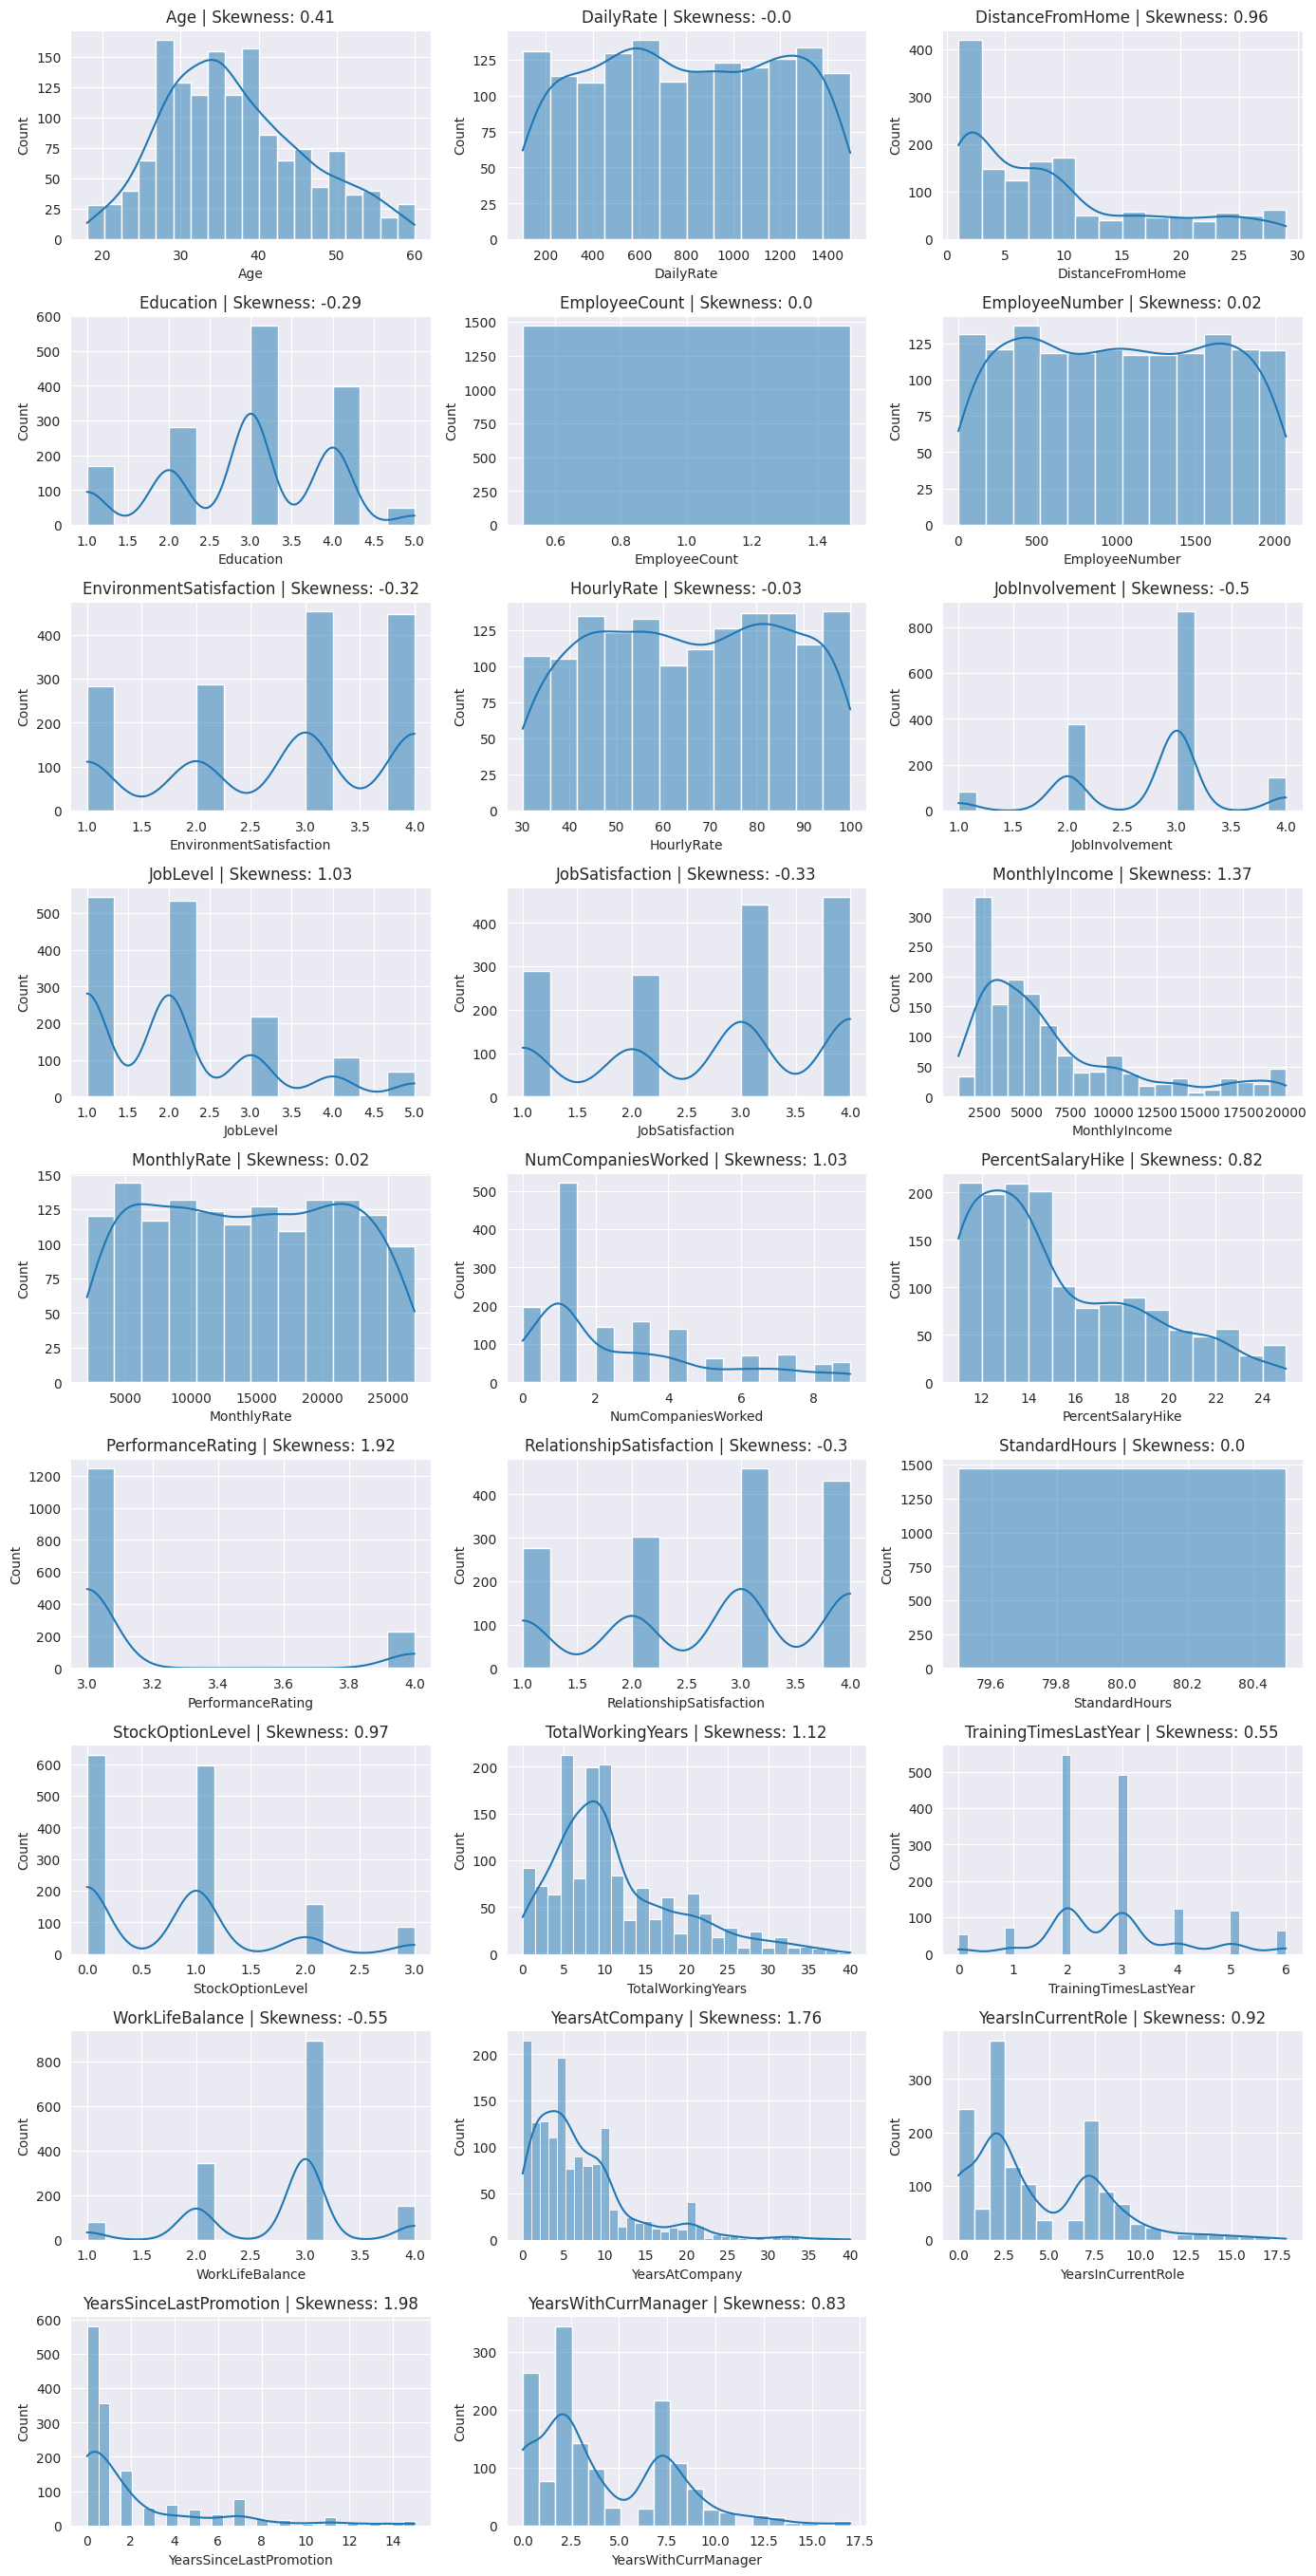

In [ ]:
sns.set_style("darkgrid")

# Identify numerical columns
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Plot distribution of each numerical feature
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 3, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [ ]:
# drop constant columns
dropCols = ['EmployeeCount','Over18','StandardHours']
df = df.drop(columns=dropCols)

In [ ]:
#find categorical cols and cols with 2 unique values
cols_to_bnry = []

for col in df.columns:
    if df[col].dtype == 'object' or df[col].nunique() <= 2:
        cols_to_bnry.append(col)
        #print col name and its unique categorical values
        print(col, ": ", df[col].unique())

#create and head df of categorical cols
bnry_df = df[cols_to_bnry]
display(bnry_df.head(5))

Attrition :  ['Yes' 'No']
BusinessTravel :  ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department :  ['Sales' 'Research & Development' 'Human Resources']
EducationField :  ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender :  ['Female' 'Male']
JobRole :  ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus :  ['Single' 'Married' 'Divorced']
OverTime :  ['Yes' 'No']
PerformanceRating :  [3 4]


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime,PerformanceRating
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes,3
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No,4
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes,3
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes,3
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No,3


In [ ]:
bnry_df = pd.get_dummies(bnry_df, drop_first=True)
display(bnry_df.head(5))

,PerformanceRating,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,3,True,False,True,False,True,True,False,False,False,...,False,False,False,False,False,True,False,False,True,True
1,4,False,True,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
2,3,True,False,True,True,False,False,False,False,True,...,True,False,False,False,False,False,False,False,True,True
3,3,False,True,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,3,False,False,True,True,False,False,False,True,False,...,True,False,False,False,False,False,False,True,False,False


In [ ]:
# remap true and false values to 1 and 0 respectively
for col in bnry_df:
    bnry_df[col] = bnry_df[col].astype(int)
    bnry_df.loc[bnry_df[col] == True, col] = 1
    bnry_df.loc[bnry_df[col] == False, col] = 0

In [ ]:
# remap 4 and 3 in Performance Rating to 1 and 0 respectively
bnry_df.loc[bnry_df['PerformanceRating'] == 4, 'PerformanceRating'] = 1
bnry_df.loc[bnry_df['PerformanceRating'] == 3, 'PerformanceRating'] = 0

In [ ]:
display(bnry_df.head(5))

,PerformanceRating,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
bnry_df = bnry_df.rename(columns={'PerformanceRating': 'PerformanceRating4', 'Attrition_Yes': 'Attrition', 'BusinessTravel_Travel_Frequently': 'Travel_Frequently',
                                  'BusinessTravel_Travel_Rarely': 'Travel_Rarely', 'Department_Research & Development': 'Department_R&D', 'MaritalStatus_Married': 'Married',
                                  'OverTime_Yes': 'OverTime'})
display(bnry_df.head(5))

,PerformanceRating4,Attrition,Travel_Frequently,Travel_Rarely,Department_R&D,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Married,MaritalStatus_Single,OverTime
0,0,1,0,1,0,1,1,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,1,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0,1,0,1,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,1,1
3,0,0,1,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
4,0,0,0,1,1,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
df = df.drop(columns=cols_to_bnry)

#merge df and bnry df
df = df.merge(bnry_df, how='outer', left_index=True, right_index=True)

#head merged df
display(df.head(5))

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,Married,MaritalStatus_Single,OverTime
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [ ]:
# Assign values to the X and y variables:
X = df.iloc[:, :-1].values
y = df.iloc[:, 45].values   ####change the "12" to the number of total colomn
feature_names = [f"Feature_{i}" for i in range(X.shape[1])]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

In [ ]:
# Standardize features by removing mean and scaling to unit variance:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
# Use the Logistic Regression classifier to fit data:
classifier_LR = LogisticRegression(penalty=None)
classifier_LR.fit(X_train, y_train)


LogisticRegression(penalty=None)

In [ ]:
classifier_LR.score(X_test, y_test)

0.7346938775510204

In [ ]:
classifier_LR.score(X_train, y_train)

0.7308066083576288

In [ ]:
# Use the Lasso penalty
classifier_LR_l1 = LogisticRegression(penalty='l1', solver='liblinear')
classifier_LR_l1.fit(X_train, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
classifier_LR_l1.score(X_test, y_test)

0.7301587301587301

In [ ]:
classifier_LR_l1.score(X_train, y_train)

0.7288629737609329

In [ ]:
l1_coefficients = classifier_LR_l1.coef_.flatten()

In [ ]:
selected_features_l1 = [
    feature for feature, coef in zip(feature_names, l1_coefficients) if coef != 0
]
print("Selected Features (L1 Penalty):", selected_features_l1)

Selected Features (L1 Penalty): ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_17', 'Feature_18', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_25', 'Feature_26', 'Feature_27', 'Feature_30', 'Feature_31', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_38', 'Feature_39', 'Feature_40', 'Feature_42', 'Feature_43', 'Feature_44']


In [ ]:
# Use the Ridge penalty
classifier_LR_l2 = LogisticRegression()
classifier_LR_l2.fit(X_train, y_train)

LogisticRegression()

In [ ]:
classifier_LR_l2.score(X_test, y_test)

0.7324263038548753

In [ ]:
classifier_LR_l2.score(X_train, y_train)

0.7308066083576288

In [ ]:
l2_coefficients = classifier_LR_l2.coef_.flatten()


array([ 2.06727047e-04, -1.74337879e-04,  1.27557319e-02, -6.80464701e-03,
       -2.28845288e-04,  5.58575150e-03,  1.99518928e-03, -7.46436264e-04,
       -1.15198192e-03, -2.45500926e-03,  6.28731843e-06, -3.12429837e-06,
       -6.39696061e-03, -3.43209516e-02,  2.26724087e-04, -2.65884268e-03,
        6.38281599e-03, -1.71722621e-02, -8.71965736e-03, -1.32169504e-02,
       -1.37933300e-02, -1.62634649e-02, -1.50319082e-02,  2.70985882e-04,
        9.04853603e-03,  6.79002230e-04, -4.95407738e-04, -1.69548895e-03,
        3.03335708e-04, -1.93220019e-03,  6.22550387e-04, -5.17215515e-04,
        6.22167476e-04, -3.14195920e-04, -5.13379928e-03, -6.96322586e-04,
       -3.09834207e-03, -1.05912173e-04, -1.41582610e-04, -3.46125792e-04,
        2.67822029e-03,  3.60563462e-04, -3.83458322e-04, -1.09738615e-03,
       -9.60524467e-04])

In [ ]:
selected_features_l2 = [
    feature for feature, coef in zip(feature_names, l2_coefficients) if coef != 0
]
print("Selected Features (L1 Penalty):", selected_features_l1)

Selected Features (L1 Penalty): ['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'Feature_16', 'Feature_17', 'Feature_18', 'Feature_19', 'Feature_20', 'Feature_21', 'Feature_22', 'Feature_23', 'Feature_24', 'Feature_26', 'Feature_27', 'Feature_29', 'Feature_32', 'Feature_33', 'Feature_34', 'Feature_35', 'Feature_36', 'Feature_37', 'Feature_39', 'Feature_40', 'Feature_41', 'Feature_42', 'Feature_43', 'Feature_44']


Random Forest

In [ ]:
skew_limit = 0.75
skew_vals = df.skew()
skew_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

display(skew_cols.style.set_caption('Columns to be log-transformed:'))

# Log-transform skewed variables
for i in skew_cols.index.values:
    df[i] = df[i].apply(np.log1p)

,Skew
JobRole_Human Resources,5.035637
JobRole_Research Director,3.932443
EducationField_Other,3.875119
JobRole_Sales Representative,3.847192
JobRole_Manager,3.392611
EducationField_Technical Degree,2.872604
JobRole_Manufacturing Director,2.694844
EducationField_Marketing,2.525783
YearsSinceLastPromotion,1.984290
PerformanceRating4,1.921883
